In [1]:
# Import Libraries
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
X=np.load("X.npy")
Y=np.load("Y.npy")

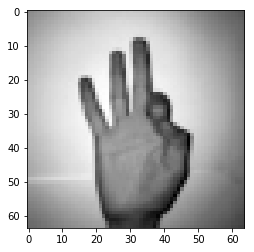

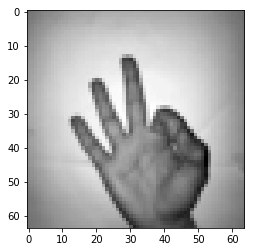

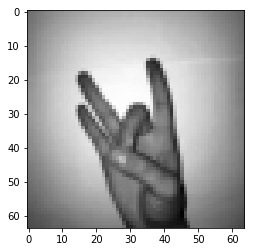

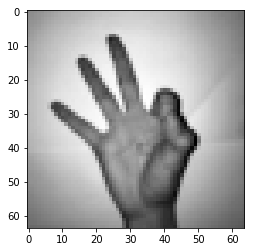

In [4]:
plt.imshow(X[1],cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(X[12],cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(X[1222],cmap = plt.get_cmap('gray'))
plt.show()
plt.imshow(X[132],cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
X=X.reshape(2062,1,64,64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.12706, random_state=42)
X_train.shape

(1800, 1, 64, 64)

In [7]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(X_train)
targetsTrain = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(X_test)
targetsTest = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

In [8]:
class Simple_Net(nn.Module):
    def __init__(self):
        super(Simple_Net,self).__init__()
        
        #convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        #max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        #convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2=nn.ReLU()
        
        #max pool2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        
        #convolution 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0)
        self.relu3=nn.ReLU()
        
        #max pool 3
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        

        
        
        #fully connected layers
        
        self.fc1=nn.Linear(64*4*4,1000)
        self.fc2=nn.Linear(1000,1000)
        self.fc3=nn.Linear(1000,100)
        self.fc4=nn.Linear(100,10)
        

    def forward(self,x):
        #convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        #max pool 1
        out = self.maxpool1(out)
        
        #convolution 2
        out=self.cnn2(out)
        out = self.relu2(out)
        
        #max pool 2
        out=self.maxpool2(out)
        
        #convolution 3
        out=self.cnn3(out)
        out = self.relu3(out)
        
        #max pool 2
        out=self.maxpool3(out)

        
        
        
        
        out=out.view(out.size(0), -1)
        
        
        #fully connected layers
        
        out=self.fc1(out)
        out=self.fc2(out)
        
        out=self.fc3(out)
        out=self.fc4(out)
        
        return out
         
        

In [9]:
featuresTrain.shape

torch.Size([1800, 1, 64, 64])

In [10]:
batch_size = 100

In [11]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [23]:
model = Simple_Net()
criterion  = nn.CrossEntropyLoss()

learning_rate = 0.05

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

Simple_Net(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [25]:
losses=[]
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        
        loss = criterion(outputs, torch.max(labels, 1)[1])
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
    
    losses.append(running_loss/18)
    if epoch%10==0:
        print('epoch: %d, loss: %f' %
                  (epoch, running_loss / 18))

epoch: 0, loss: 2.303918
epoch: 10, loss: 2.300399
epoch: 20, loss: 2.290505
epoch: 30, loss: 1.063351
epoch: 40, loss: 0.273627
epoch: 50, loss: 0.639930
epoch: 60, loss: 0.082579
epoch: 70, loss: 0.015211
epoch: 80, loss: 0.004025
epoch: 90, loss: 0.001917


In [26]:
test_prediction=model(featuresTest.to(device))

In [27]:
test_prediction=test_prediction.cuda().cpu()

In [28]:
test_score=accuracy_score(torch.max(test_prediction, 1)[1], torch.max(targetsTest, 1)[1])
test_score

0.950381679389313

In [33]:
model.cpu()

Simple_Net(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [34]:
train_prediction=model(featuresTrain)

In [35]:
train_score=accuracy_score(torch.max(train_prediction, 1)[1], torch.max(targetsTrain, 1)[1])
train_score

1.0